# Jupyter Notebook zur Darstellung, sowie Export von Messdaten
[python-Module: *pandas, matplotlib, numpy*]


## 1. Benötigte python-Module laden


In [1]:
import pandas as pd
import funx 
import numpy as np
import matplotlib.pyplot as plt
df=funx.startup()

## 2.  Dateien mit Messdaten von File-Server einlesen
### Parameter festlegen:
***ndays***   ...Anzahl der Tage, die von heute rückblickend dargestellt werden sollen

In [2]:
ndays=7#beliebig wählbar 
dfs=funx.getdfs_frommulticsv(ndays) #Liste von pandas-Datenframes (pro Logger ein Datenframe)

Logger01 20200907.txt not found on File Server
Logger02 20200907.txt not found on File Server
Logger02 20200906.txt not found on File Server
Logger02 20200903.txt not found on File Server
Logger03 20200907.txt not found on File Server


## 3. Messdaten interaktiv plotten

* Erzeugen eines Multi-Linien-Plots
* Das Dropdown-Menü ermöglicht die Darstellung eines einzelnen Loggers

*r1min* Regenhöhe 1 min [mm]; *mabs* Masse des Behälters samt Inhalt [g]; *rsum* täglich kumulierte Regenhöhe [mm]; *T* Lufttemperatur [°C]; *H* Luftfeuchtigkeit [%]; *p* Luftdruck [mbar], *U* elektr. Spannung der Batterie [V]

Dropdown(description='Darstellung:', options=('Alle_Logger', 'Logger_01', 'Logger_02', 'Logger_03'), value='Al…

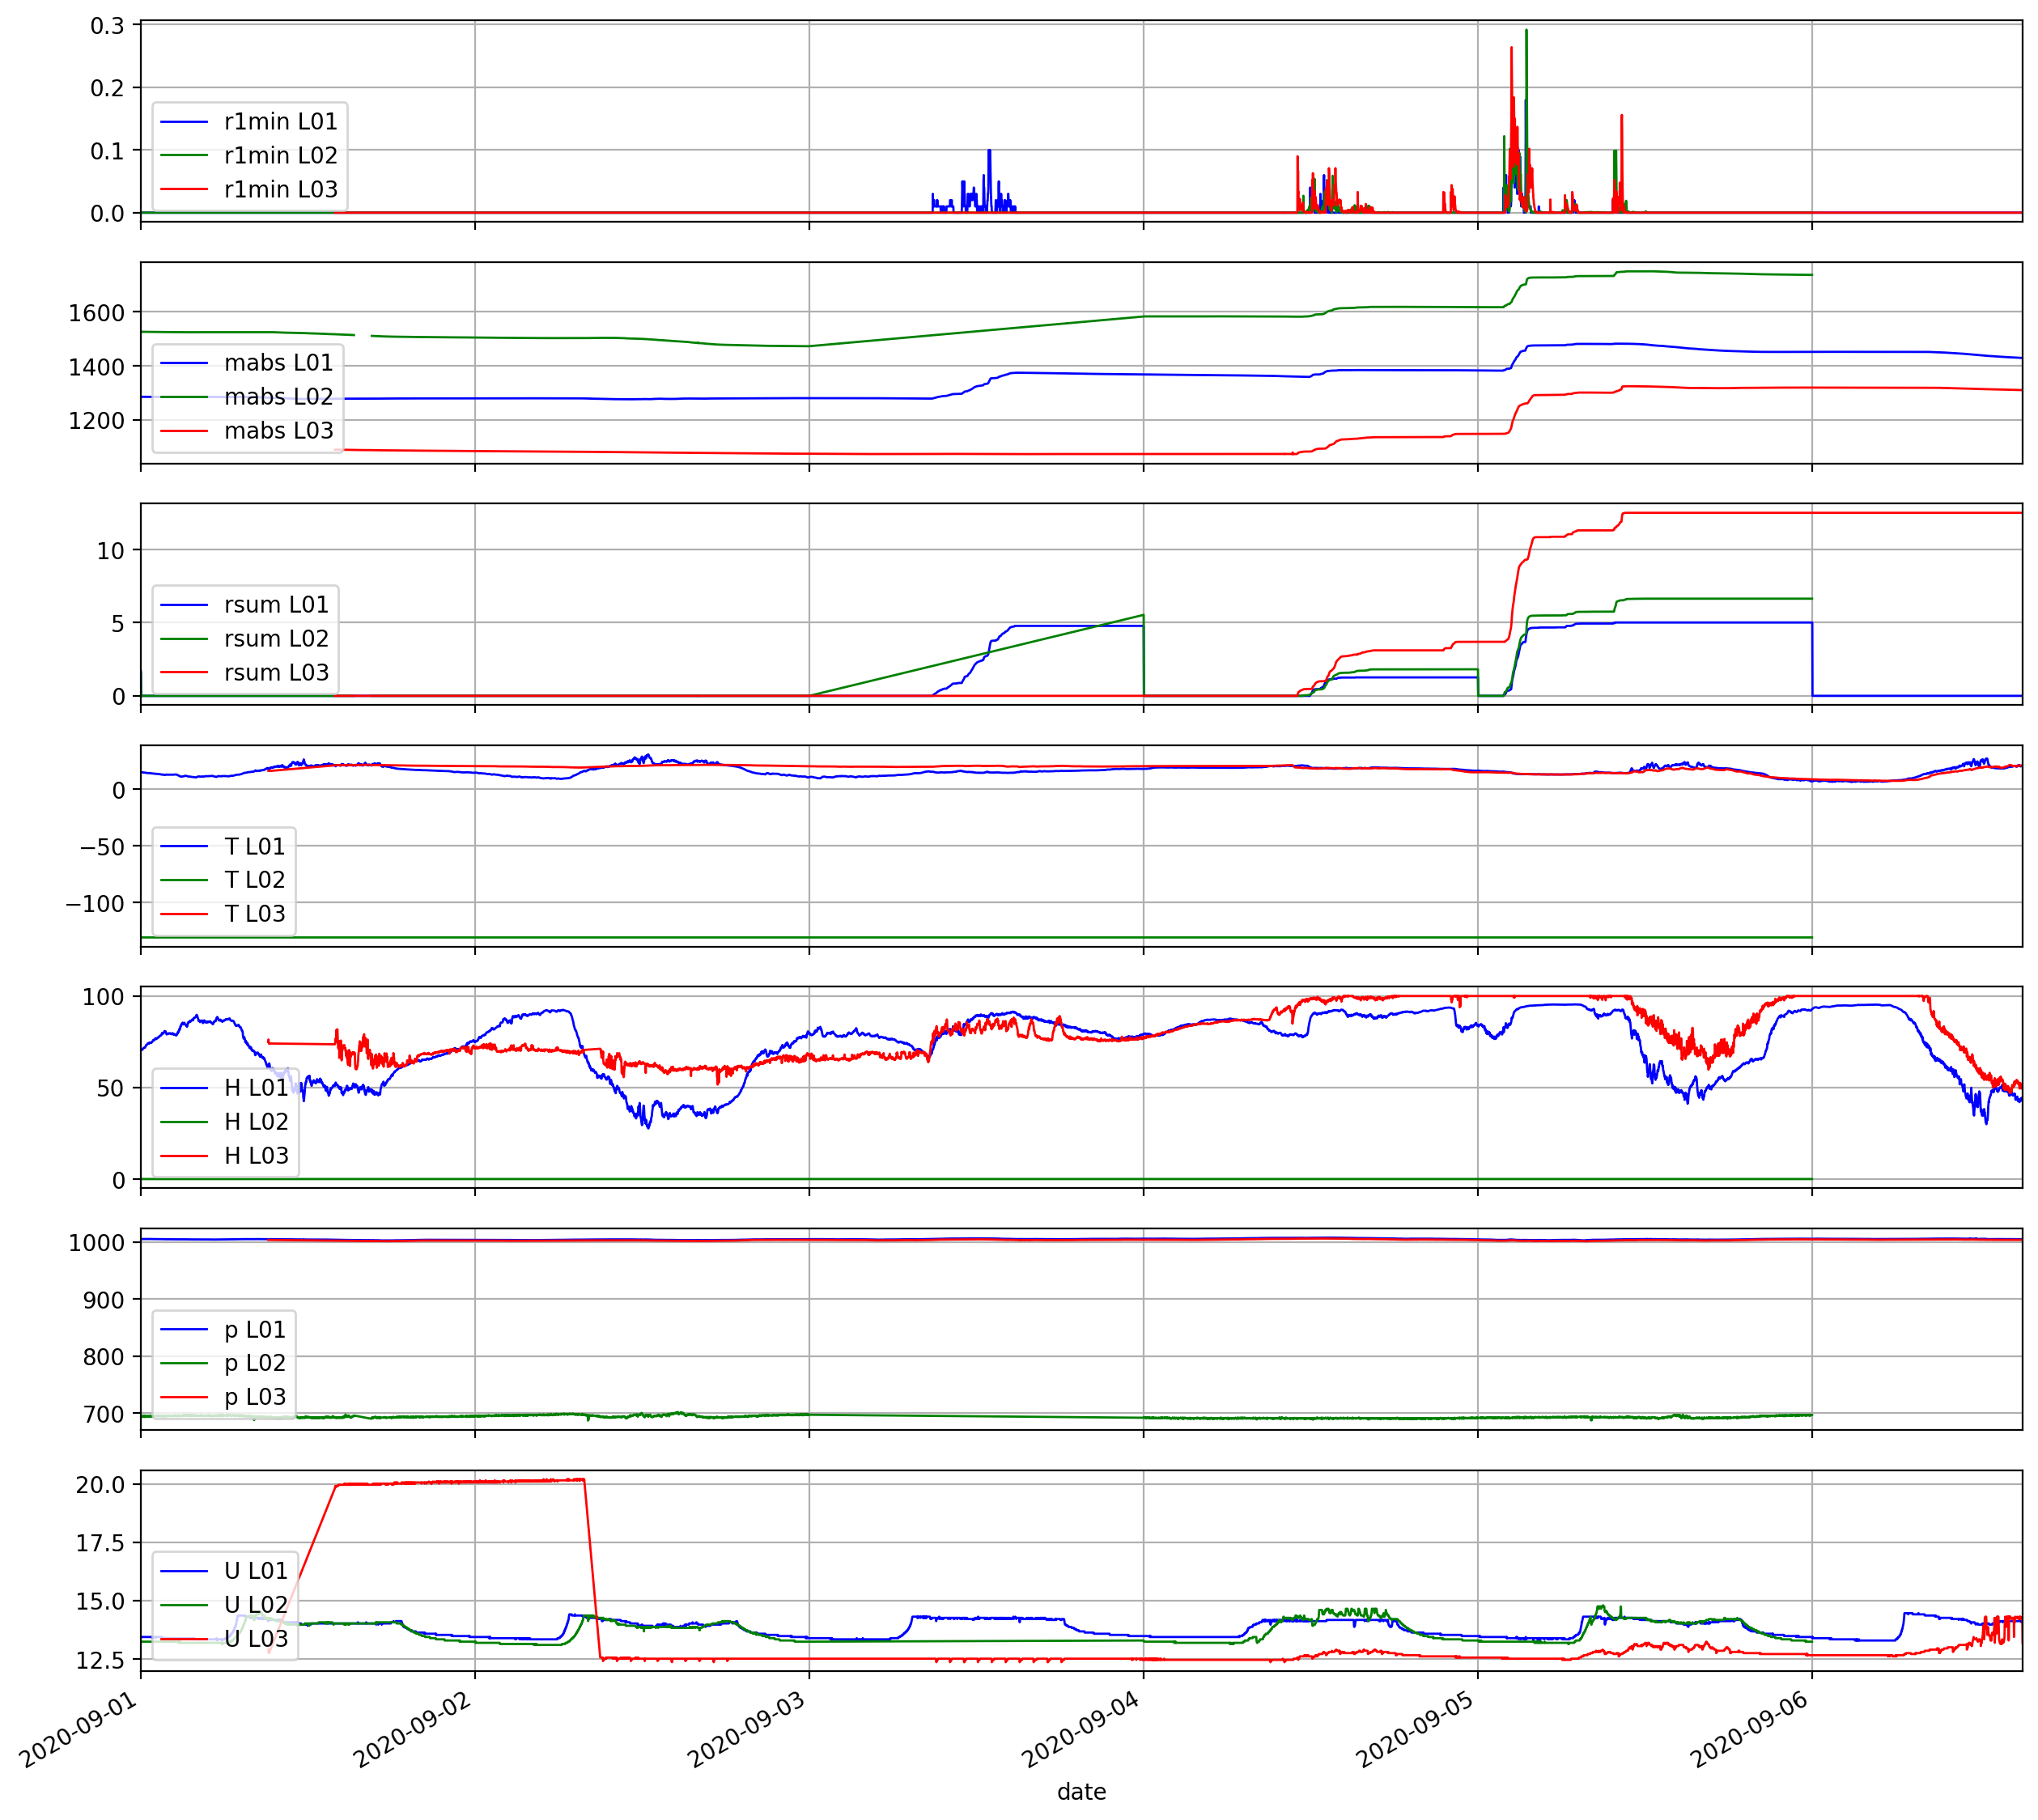

In [3]:
## Darstellung der ganzen (durch ndays festgelegten, siehe 2.) Zeitspanne
startdate=str(dfs[0].index[0])
enddate=str(dfs[0].index[-1])
## alternativ: Festlegen eines Zeitabschnitts zur Darstellung
#startdate="2020-03-26 00:00:00"
#enddate="2020-03-26 18:00:00"
funx.dropdown_menu(dfs,startdate,enddate)

## 4. Export der Daten

* Die Messdaten werden in Form von csv-Dateien, einer xlsx-Datei (mit Diagrammen) und einer png-Datei der dargestellten Plots exportiert
* Exportierte Daten werden im Order "Export" gespeichert (Menüaufruf: siehe Screenshot)

<img src="image1.png" width="300">

In [4]:
[df.to_csv('Export/Daten_Logger'+str(i+1)+'.csv',float_format='%.2f') for df,i in zip(dfs, range(len(dfs)))]
funx.exportdfs_toexcel_withcharts(dfs,'Export/Logger_gesamt.xlsx')